# Preproccessing Notebook
- Purpose of this notebook is to produce a baseline data file: 'housing.csv'
- Please **do not edit** this notebook.  Use the 'housing.csv' as a starting point for further experimentation and write new scripts/notebooks accordingly
- Authors: Jessica Joy, David Kim, Eugene Ng

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew


train = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
train.set_index('PID', inplace=True)
train.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,Wd Sdng,...,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,HdBoard,...,Typ,0,NaN,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,MetalSd,...,Typ,0,NaN,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,MetalSd,...,Typ,0,NaN,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,VinylSd,...,Typ,0,NaN,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [12]:
train['SalePrice'].describe()

count      2580.000000
mean     178059.623256
std       75031.089374
min       12789.000000
25%      129975.000000
50%      159900.000000
75%      209625.000000
max      755000.000000
Name: SalePrice, dtype: float64

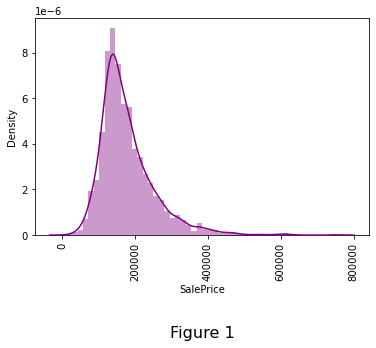

In [13]:
k=1
#check the distribution
sns.distplot(train['SalePrice'], color = 'purple')
plt.xticks(rotation=90);
plt.title('Figure {}'.format(k), y=-0.5, fontsize = 16)
k=k+1

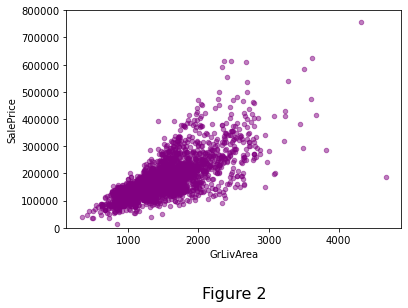

In [14]:
train.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000), c ='purple',alpha = 0.5);

plt.title('Figure {}'.format(k), y=-0.35, fontsize = 16)
k=k+1

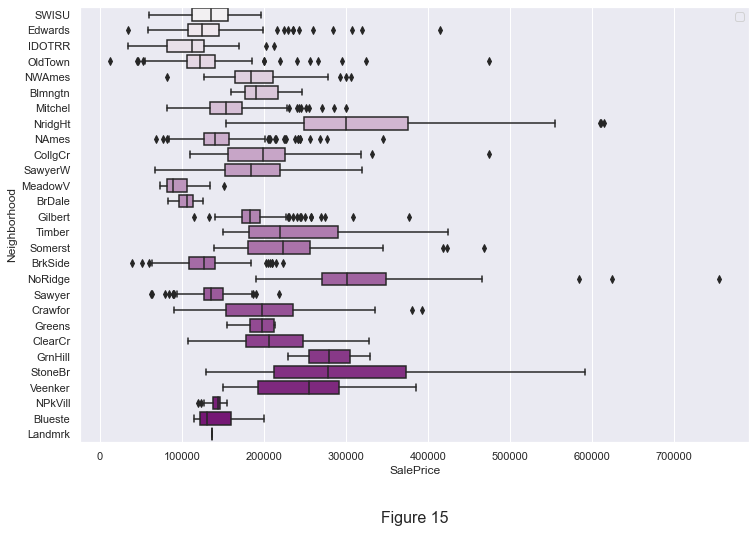

In [34]:


f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x="SalePrice" ,y='Neighborhood', hue='Neighborhood', data=train, color = 'purple',dodge=False)
fig.legend('')
# fig.axis(ymin=0, ymax=800000);
plt.title('Figure {}'.format(k), y=-0.2, fontsize = 16)
k=k+1



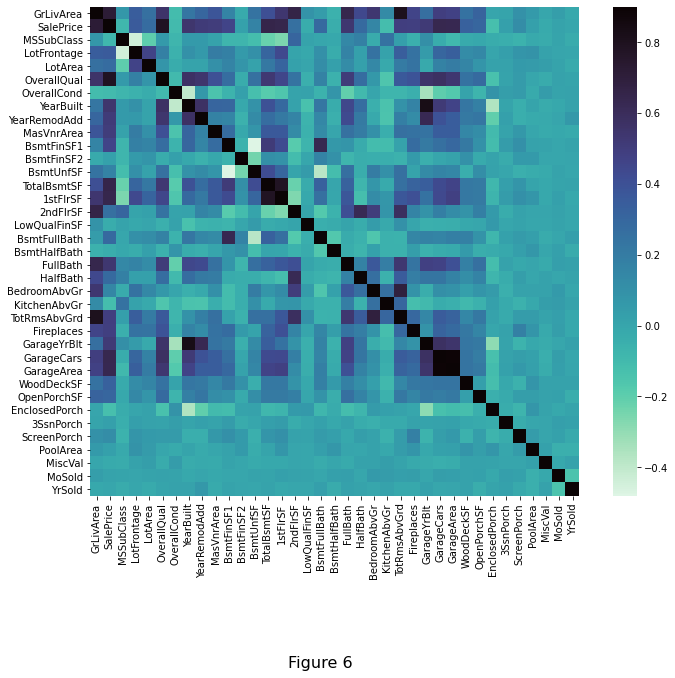

In [18]:


#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
heatm = sns.heatmap(corrmat, vmax=0.9, square=True, cmap = 'mako_r');
heatm.text(15, 50, 'Figure {}'.format(k),fontsize=16)
k=k+1



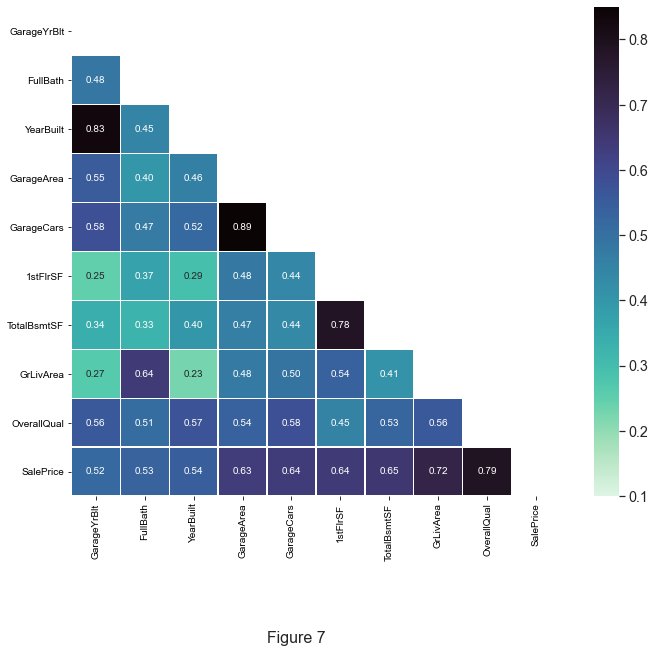

In [19]:
#saleprice correlation matrix
n = 10 #number of parameters for heatmap
cols = corrmat.nlargest(n, 'SalePrice')['SalePrice'].index
cols2 = np.array(list(reversed(cols)))
cm = train[cols2].corr()
# mask to get only the upper triangle of the matrix, as the lower one is just repeated information
mask = np.triu(np.ones_like(cm, dtype=np.bool))
# adjust mask and df

cm2 = cm.iloc[1:,:-1].copy()
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.3)
heatmap = sns.heatmap(cm,mask=mask, cbar=True, annot=True, square=True, cmap = 'mako_r', fmt='.2f', vmin=.1, vmax=.85,linewidth=0.3, annot_kws={'size': 10}, yticklabels=cols2, xticklabels=cols2)
heatmap.text(4, 13, 'Figure {}'.format(k),fontsize=16)
k=k+1

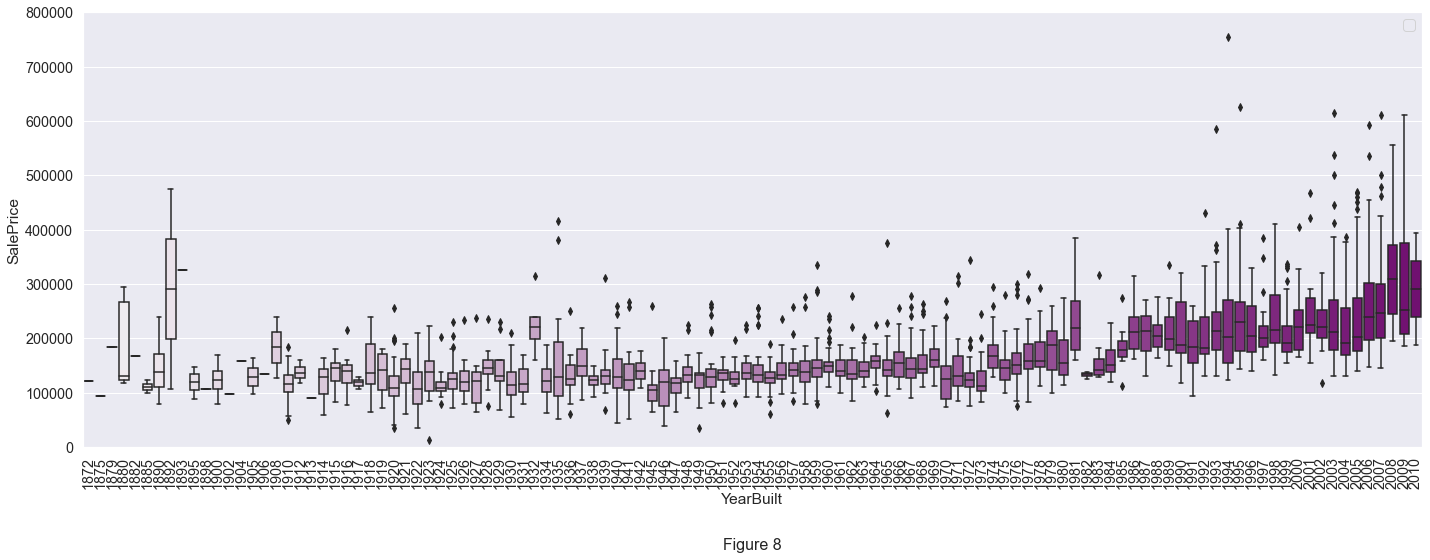

In [20]:


f, ax = plt.subplots(figsize=(24, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", hue='YearBuilt', data=train, color = 'purple',dodge=False)
fig.legend('')
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);
plt.title('Figure {}'.format(k), y=-0.25, fontsize = 16)
k=k+1



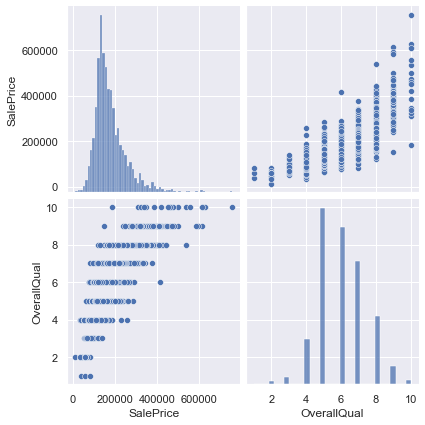

In [29]:
#seaborn pairplot
sns.set()
cols = ['SalePrice', 'OverallQual']
pairp = sns.pairplot(train[cols], size = 3, )
plt.show();

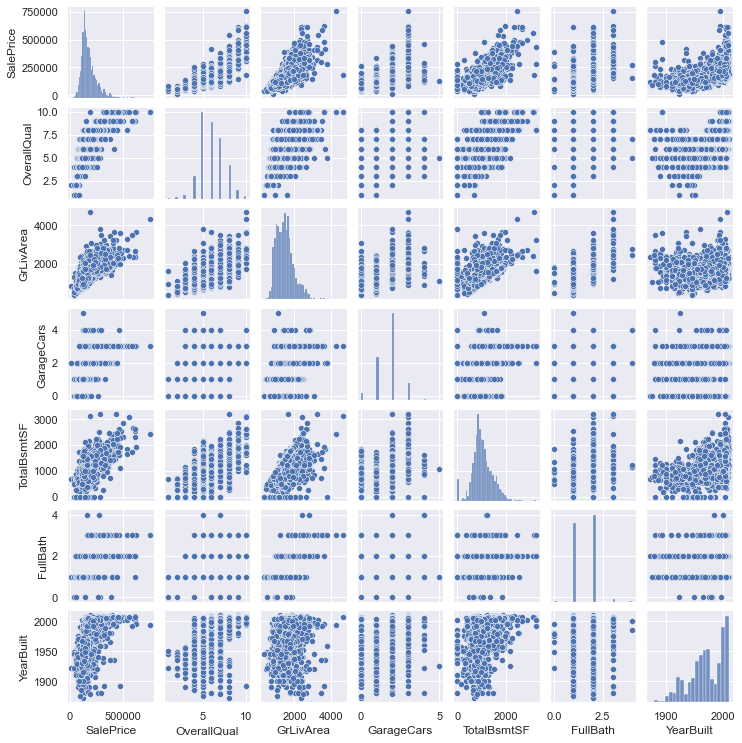

In [21]:
#seaborn pairplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
pairp = sns.pairplot(train[cols], size = 1.5, )
plt.show();

In [22]:
#measuring missing data
total = train.isnull().sum().sort_values(ascending=False)
percentage = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percentage], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,2571,0.996512
MiscFeature,2483,0.962403
Alley,2412,0.934884
Fence,2055,0.796512
FireplaceQu,1241,0.481008
LotFrontage,462,0.179070
GarageYrBlt,129,0.050000
GarageQual,129,0.050000
GarageCond,129,0.050000
GarageFinish,129,0.050000


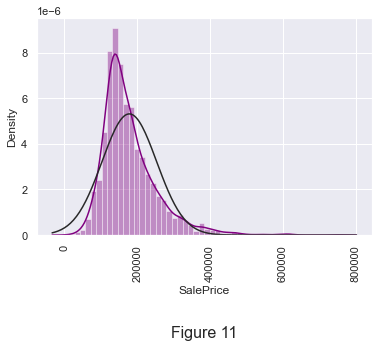

In [25]:
sns.distplot(train['SalePrice'], color= 'purple', fit=norm);
plt.xticks(rotation=90);
plt.title('Figure {}'.format(k), y=-0.5, fontsize = 16)
k=k+1

In [106]:
housing = housing[['SalePrice','MSSubClass','MSZoning','LotArea','Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl','GrLivArea','Exterior1st','MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',\
                   'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',\
                   'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',\
                   'Heating', 'HeatingQC', 'CentralAir','MoSold', 'YrSold','SaleCondition',\
                   'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',\
                   'BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd',\
                   'Functional','Fireplaces','FireplaceQu','GarageType','GarageFinish',\
                   'GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive',\
                   'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','Fence']]
housing

,SalePrice,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,GrLivArea,Exterior1st,MasVnrType,MasVnrArea,...,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
909176150,126000,30,RL,7890,Pave,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,6,6,1939,1950,Gable,CompShg,856,Wd Sdng,None,0.0,...,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,NaN
905476230,139500,120,RL,4235,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,5,5,1984,1984,Gable,CompShg,1049,HdBoard,BrkFace,149.0,...,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,NaN
911128020,124900,30,C (all),6060,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,5,9,1930,2007,Hip,CompShg,1001,MetalSd,None,0.0,...,0.0,0.0,1,0,2,1,Gd,5,Typ,0,NaN,Detchd,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,NaN
535377150,114000,70,RL,8146,Pave,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,4,8,1900,2003,Gable,CompShg,1039,MetalSd,None,0.0,...,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,NaN
534177230,227000,60,RL,8400,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,8,6,2001,2001,Gable,CompShg,1665,VinylSd,None,0.0,...,1.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903205040,121000,30,RL,8854,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,6,6,1916,1950,Gable,CompShg,952,Wd Sdng,None,0.0,...,0.0,0.0,1,0,2,1,Fa,4,Typ,1,Gd,Detchd,Unf,1.0,192.0,Fa,Po,P,0,98,0,0,40,0,NaN
905402060,139600,20,RL,13680,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,5,1955,1955,Hip,CompShg,1733,BrkFace,None,0.0,...,0.0,0.0,2,0,4,1,TA,8,Min2,1,Gd,Attchd,Unf,2.0,452.0,TA,TA,Y,0,0,0,0,0,0,NaN
909275030,145000,90,RH,6270,Pave,Reg,HLS,AllPub,Inside,Gtl,Crawfor,Norm,Norm,Duplex,2Story,5,6,1949,1950,Gable,CompShg,2002,MetalSd,None,0.0,...,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,2Types,Unf,3.0,871.0,TA,TA,Y,0,0,0,0,0,0,NaN


### Convert Ordinals

In [107]:
#convert ordinal categorical variables

# Basement Condition
housing.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
housing.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
housing.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
housing.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Basement Quality
housing.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Quality
housing.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
housing.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Heating Quality and Condition
housing.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

#Fence quality
housing.Fence.replace({'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}, inplace=True)

#Kitchen, garage and pavedDrive quality
housing.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
housing.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

#(LotShape, LotContour, Utilities, LandSlope)
housing.LotShape.replace({'IR3':1, 'IR2':2, 'IR1':3, 'Reg':4}, inplace=True)
housing.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)
housing.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)
housing.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

##### Convert MSSubClass column to categorical

In [108]:
housing['MSSubClass'] = housing['MSSubClass'].astype(str)

### Data Cleanup: fillna

In [109]:
#NAs to 0
housing[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','MasVnrType','MasVnrArea','Fence']] = \
housing[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','MasVnrType','MasVnrArea','Fence']].fillna(0)
housing[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','ExterQual','ExterCond','HeatingQC']] = \
housing[['BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','ExterQual','ExterCond','HeatingQC']].fillna(0)

# Filling nominal NA's with 0's (no basement or garage)
housing['GarageQual'].fillna(0, inplace = True)
housing['GarageCond'].fillna(0, inplace = True)
housing['GarageCars'].fillna(0, inplace = True)
housing['GarageArea'].fillna(0, inplace = True)

# Filling categorical NA's with 'None' (no garage)
housing['GarageType'].fillna('None', inplace = True)
housing['GarageFinish'].fillna('None', inplace = True)

### Data Cleanup: Combine Bathrooms to create 'TotalBath' feature

In [110]:
# Filling Basement bathroom NA's with 0
housing['BsmtFullBath'].fillna(0, inplace = True)
housing['BsmtHalfBath'].fillna(0, inplace = True)

# Combining bathrooms to single variable and dropping the individual counts
housing['TotalBath'] = housing['BsmtFullBath'] + (housing['BsmtHalfBath']*5) + housing['FullBath'] + (housing['HalfBath']*.5)
housing.drop(['BsmtFullBath', 'BsmtHalfBath', 'HalfBath'], axis = 1, inplace = True)

### Convert Binary categorical

In [111]:
#convert CentralAir - binary categorical
housing['CentralAir'] = housing.CentralAir.map(lambda t:0 if t=='N' else 1)

#make binary - add hip to style?
housing['RoofStyle']= [1 if x =='Gable' else 0 for x in housing['RoofStyle']]
housing['RoofMatl']= [1 if x =='CompShg' else 0 for x in housing['RoofMatl']]

housing.rename(columns = {'RoofStyle': 'RoofStyle_Gable', 'RoofMatl': 'RoofMatl_CompShg'}, inplace = True)

#create street binary
housing['Street']= [1 if x =='Pave' else 0 for x in housing['Street']]
housing.rename(columns = {'Street': 'Street_Paved'}, inplace = True)

### Dummification

In [112]:
dummies=['Exterior1st','MasVnrType','Foundation','Heating',\
         'SaleCondition','Functional','GarageType','GarageFinish',\
        'MSSubClass','MSZoning','BldgType','LotConfig','HouseStyle',\
         'Neighborhood','Condition1']

for d in dummies:
    temp = pd.get_dummies(housing[d], prefix=d, prefix_sep='__')
    temp = temp.drop(d+'__'+str(housing[d].mode()[0]), axis=1)
    #drop the most common one (mode), making it the base case
    housing = pd.concat([housing.drop(d, axis=1),temp], axis=1)
    #merge back with main df

### Drop these columns
- Dropping GarageArea/GarageCond because they are less correlated than their counterpats GarageCars/GarageQual

In [113]:
housing.drop(['GarageArea', 'GarageCond'], axis = 1, inplace = True)
housing.drop(['FireplaceQu'], axis = 1, inplace = True)
housing.drop(['Condition2'], axis = 1, inplace = True)

### Remove Outliers

In [115]:
housing.drop(housing[housing["GrLivArea"] > 4000].index, inplace = True)

### Log Transformations

In [117]:
housing['LotArea']=np.log(housing['LotArea'])
housing['GrLivArea'] = np.log(housing['GrLivArea'])
housing['SalePrice'] = np.log(housing['SalePrice'])
housing.rename(columns = {'LotArea': 'LotArea_Log', 'GrLivArea':'GrLivArea_Log', 'SalePrice':'SalePrice_Log'}, inplace = True)

### Feature engineer: Add distance to ISU

In [118]:
ISU_dist = pd.read_csv('./data/ISU_dist.csv', index_col=0)
housing = housing.merge(ISU_dist, how='left', left_index=True, right_index=True)
housing['ISU_dist'].fillna(np.mean(housing.ISU_dist),inplace=True)

### file sanity check

In [119]:
missing = housing.isnull().sum()
missing = missing[missing > 0]
missing

Series([], dtype: int64)

In [120]:
from sklearn.feature_selection import f_regression
Y = housing['SalePrice_Log']
F_values, p_values = f_regression(housing, Y)
pd.Series(p_values, index=housing.columns).sort_values()

GarageCars               0.000000e+00
OverallQual              0.000000e+00
GrLivArea_Log            0.000000e+00
ExterQual                0.000000e+00
KitchenQual             6.384656e-308
                            ...      
YrSold                   9.051819e-01
Exterior1st__Plywood     9.699981e-01
LotConfig__FR2           9.804564e-01
HouseStyle__2.5Unf       9.957089e-01
SalePrice_Log            1.000000e+00
Length: 167, dtype: float64

In [121]:
housing.to_csv('housing.csv')